In [1]:
PATH = "/home/mmahsereci/github/webpage/img/2021-09-01-confidence-intervals/"
SAVE= False

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

## multiple runs

In [2]:
import numpy as np
np.random.seed(42)

# fair coin
p = 0.5

# Bernoulli samples: 1 means heads, 0 means tails
n_samples = int(1e4)  # more samples than before
n_runs = 1000  # number of runs

# Bernoulli samples: 1 means heads, 0 means tails
samples = 1 * (np.random.rand(n_runs * n_samples) < p)
samples = np.reshape(samples, (n_runs, n_samples))

In [3]:
S = np.cumsum(samples, axis=1)
n =  np.arange(1, n_samples + 1)
means = S / n

# Standard Error exact

In [4]:
variances = 0.25 * np.ones(means.shape) / n
standard_errors = np.sqrt(variances)

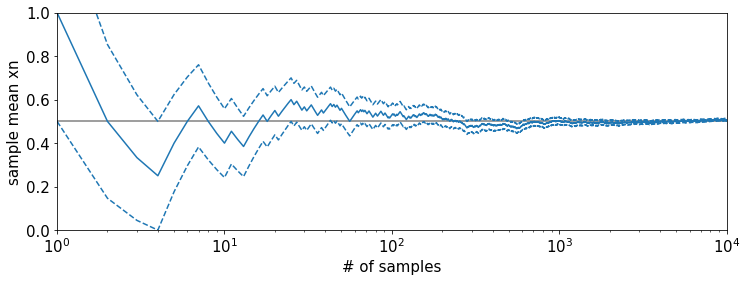

In [5]:

plt.figure(figsize=(12, 4))
plt.plot(n, means[0, :].T + standard_errors[0, :].T, color='C0', linestyle='dashed')
plt.plot(n, means[0, :].T - standard_errors[0, :].T, color='C0', linestyle='dashed')
plt.plot(n, means[0, :].T, color='C0')
plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.xlim([1, n_samples])
plt.ylim([0, 1])
plt.xlabel("# of samples")
plt.ylabel("sample mean xn")
# plt.show()

if SAVE:
    plt.savefig(PATH + "02.png", 
                bbox_inches = 'tight',pad_inches = 0.05)

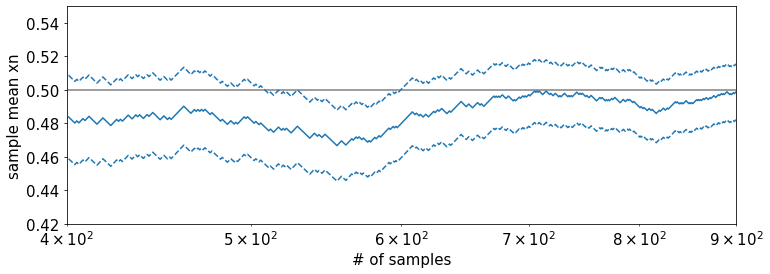

In [6]:
n_plot1 = 400
n_plot2 = 900

plt.figure(figsize=(12, 4))
plt.plot(n[n_plot1:n_plot2], means[0, n_plot1:n_plot2].T + standard_errors[0, n_plot1:n_plot2].T, color='C0', linestyle='dashed')
plt.plot(n[n_plot1:n_plot2], means[0, n_plot1:n_plot2].T - standard_errors[0, n_plot1:n_plot2].T, color='C0', linestyle='dashed')
plt.plot(n[n_plot1:n_plot2], means[0, n_plot1:n_plot2].T, color='C0')
plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.xlim([n_plot1, n_plot2])
plt.ylim([0.42, 0.55])
plt.xlabel("# of samples")
plt.ylabel("sample mean xn")
# plt.show()

if SAVE:
# if True:
    plt.savefig(PATH + "02a.png", 
                bbox_inches = 'tight',pad_inches = 0.05)

# Standard Error boostrap

In [7]:
S2 = np.cumsum(samples ** 2, axis=1)  # for Bernoulli random numbers, S and S2 are identical.
variances_bootstrap = (S2 / n - means ** 2) / n
standard_errors_bootstrap = np.sqrt(variances_bootstrap)


# empirical check of standard error

In [8]:
interval_low = means - standard_errors
interval_up = means + standard_errors

interval_bootstrap_low = means - standard_errors_bootstrap
interval_bootstrap_up  = means + standard_errors_bootstrap

In [9]:
pp = p * np.ones([n_runs, n_samples])

mask = (pp < interval_low) + (pp > interval_up)
inside = 1 - np.mean(mask, axis=0)

mask = (pp < interval_bootstrap_low) + (pp > interval_bootstrap_up)
inside_bootstrap = 1 - np.mean(mask, axis=0)

mask = None
interval_low = None
interval_up = None
interval_bootstrap_low = None
interval_bootstrap_up = None

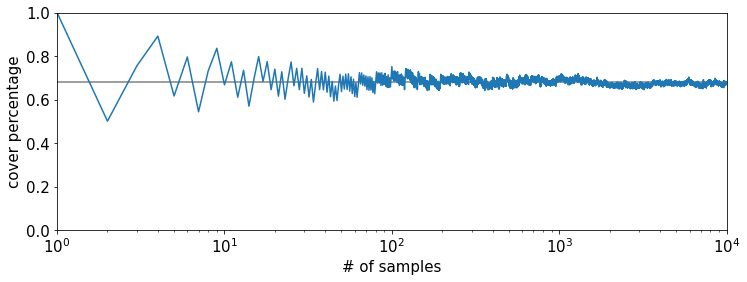

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(n, inside, color='C0')
plt.hlines(0.68, 0, n_samples, colors="gray")
plt.xscale("log")
plt.ylim([0, 1])

plt.xlim([1, n_samples])
plt.xlabel("# of samples")
plt.ylabel("cover percentage")
# plt.show()

if SAVE:
    plt.savefig(PATH + "06.png", 
                bbox_inches = 'tight',pad_inches = 0.05)

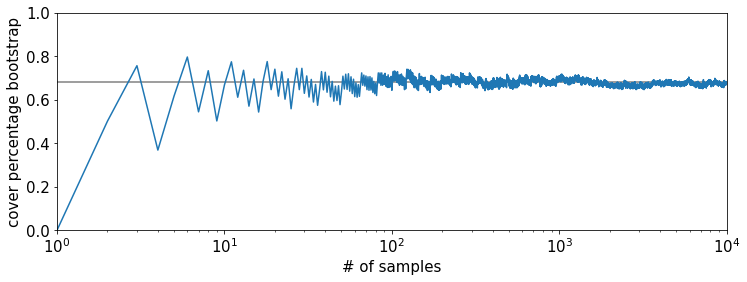

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(n, inside_bootstrap, color='C0')
plt.hlines(0.68, 0, n_samples, colors="gray")
plt.xscale("log")
plt.ylim([0, 1])

plt.xlim([1, n_samples])
plt.xlabel("# of samples")
plt.ylabel("cover percentage bootstrap")
# plt.show()


if SAVE:
    plt.savefig(PATH + "07.png", 
                bbox_inches = 'tight',pad_inches = 0.05)

# thumbnail

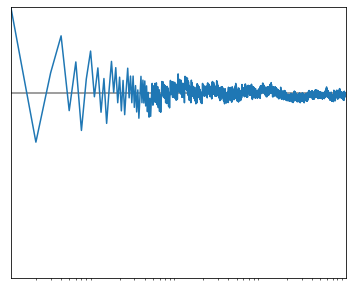

In [13]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 5))
# plt.plot(n, means[0, :].T + standard_errors_bootstrap[0, :].T, color='C0', linestyle='dotted')
# plt.plot(n, means[0, :].T - standard_errors_bootstrap[0, :].T, color='C0', linestyle='dotted')
# plt.plot(n, means[0, :].T, color='C0')
# plt.hlines(p, 0, n_samples, colors="gray")
# plt.xscale("log")
# plt.xlim([1, n_samples])
# plt.ylim([0, 1])
# plt.xticks([])
# plt.yticks([])

plt.figure(figsize=(6, 5))

plt.plot(n, inside, color='C0')
plt.hlines(0.68, 0, n_samples, colors="gray")
plt.xscale("log")
plt.xlim([1, n_samples])
plt.ylim([0, 1])
plt.xticks([])
plt.yticks([])


# plt.show()

if SAVE:
    plt.savefig(PATH + "thumbnail.png", 
                bbox_inches = 'tight',pad_inches = 0.05)